# Website Traffic Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Collection

In [4]:
data = pd.read_csv('traffic.csv')

In [8]:
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [7]:
data.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


## Data Cleaning

In [5]:
print(data.isnull().sum())

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64


In [9]:
data.fillna('Unknown', inplace=True)

## Traffic Analysis and Visualization

In [27]:
total_events = len(data)
total_artists = data['artist'].nunique()
total_pageviews = len(data[data['event'] == 'pageview'])

print(f"Total Events: {total_events}")
print(f"Total Artists: {total_artists}")
print(f"Total Page Views: {total_pageviews}")

Total Events: 226278
Total Artists: 2420
Total Page Views: 142015


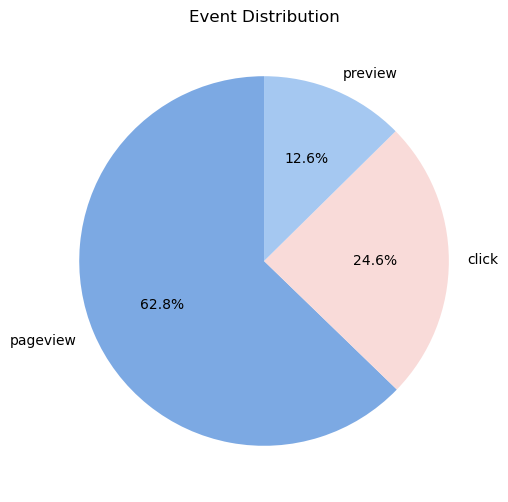

In [32]:
# Pie Chart: Distribution of Events
event_counts = data['event'].value_counts()
plt.figure(figsize=(8, 6))
event_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#7ca9e3', '#f9dbd9', '#a5c8f1'])
plt.title('Event Distribution')
plt.ylabel('')
plt.show()

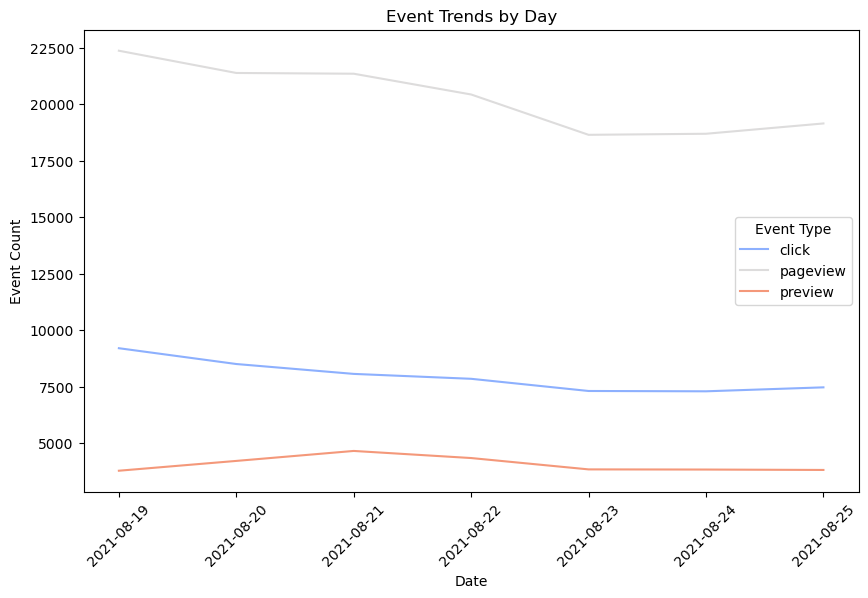

In [17]:
# Event Trends by Day
daily_events = data.groupby(['date', 'event']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_events, x='date', y='count', hue='event', palette='coolwarm')
plt.title('Event Trends by Day')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

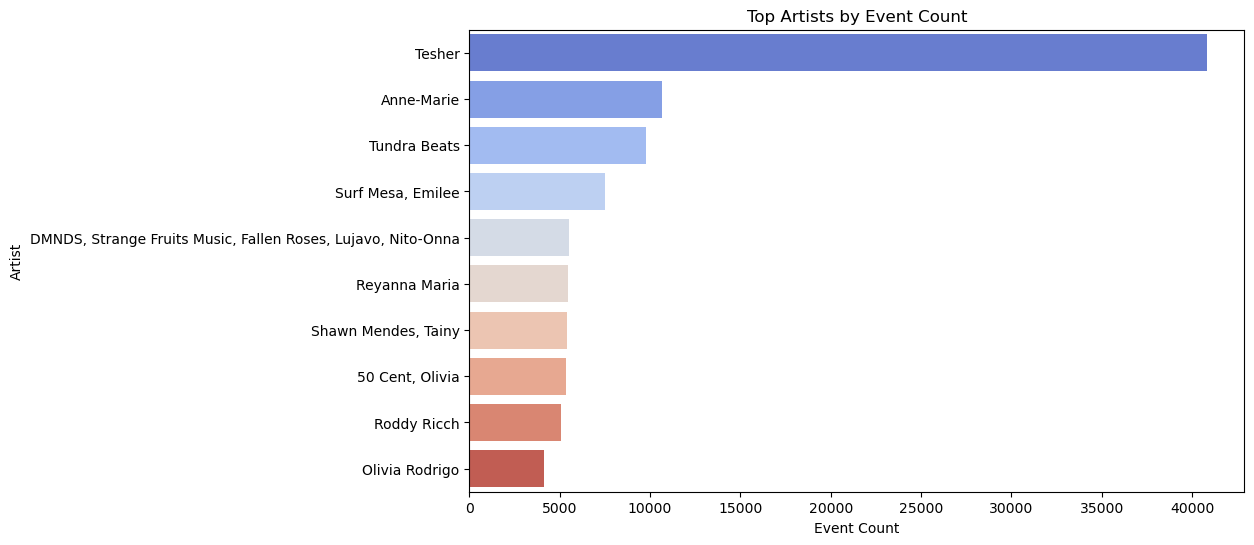

In [14]:
# Events by Artist
artist_events = data['artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_events.values, y=artist_events.index, palette='coolwarm')
plt.title('Top Artists by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Artist')
plt.show()

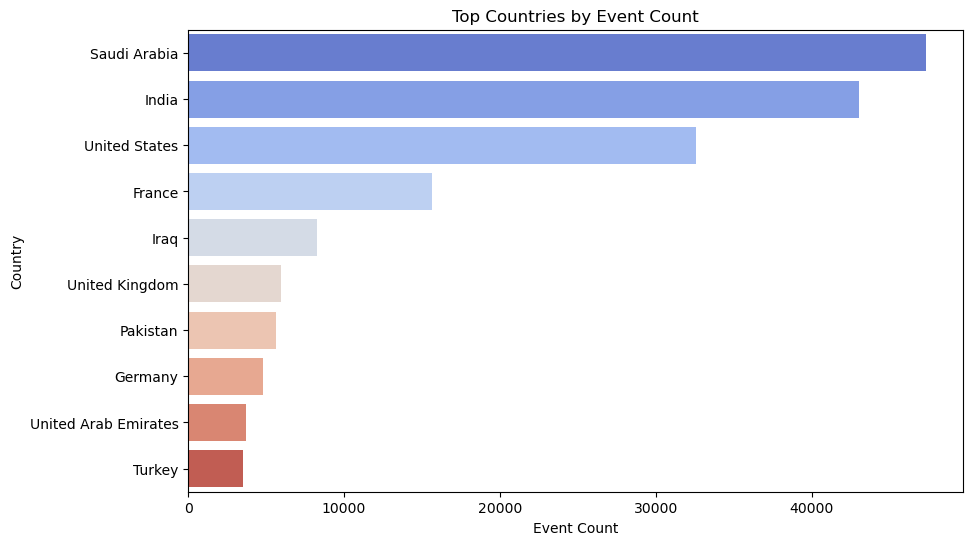

In [22]:
# Events by Country
country_events = data['country'].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_events.values, y=country_events.index, palette='coolwarm')
plt.title('Top Countries by Event Count')
plt.xlabel('Event Count')
plt.ylabel('Country')
plt.show()

In [24]:
# Heat Map: Regional Performance
geo_events = data.groupby('country')['event'].count().reset_index()
fig = px.choropleth(geo_events, locations='country', locationmode='country names',
                    color='event', title='Event Count by Country')
fig.show()

### Insights:
- Event Distribution:
The majority of the events are page views (62.76%), followed by clicks (24.63%) and previews (12.61%).
This indicates users are primarily browsing the website, with relatively fewer interactions (clicks) and the least engagement with detailed content (previews).

- Country-Level Traffic:
Saudi Arabia and India generate the highest traffic, while countries like the United States, France, and Iraq contribute comparatively less.
This suggests significant engagement from regions in the Middle East and South Asia.

- Top Artists:
Tesher is the most popular artist by event count, significantly outperforming others like Anne-Marie and Tundra Beats.
This implies a concentration of user interest in specific artists, possibly driven by trending content or marketing focus.

- Traffic Over Time:
The line chart shows a gradual decline in overall event counts across days, indicating either a drop in user interest, seasonality, or a lack of new promotional efforts.
Page views remain the most consistent event type, while clicks and previews fluctuate.

### Recommendations:
- Increase Engagement Beyond Page Views:

Focus on increasing clicks and previews by improving content discoverability and call-to-action elements.
Use interactive features like banners, carousels, or video previews to direct users to actionable content.
- Capitalize on High-Traffic Regions:

With Saudi Arabia and India driving most traffic, tailor content, promotions, and campaigns for these regions.
Consider localizing content (language, themes) to enhance engagement further in these regions.
- Boost Low-Traffic Countries:

Analyze why countries like France and Iraq generate less traffic. Launch region-specific campaigns or collaborations to tap into these markets.
- Artist-Specific Strategies:

Highlight other artists with targeted campaigns to diversify user interest beyond Tesher.
Create playlists, featured content, or collaborations centered on less popular artists to distribute attention more evenly.
- Address Declining Trends:

Investigate reasons for the decline in event counts over time. Evaluate external factors like holidays, competitor campaigns, or stale content.
Introduce new features, campaigns, or seasonal offers to re-engage users and stabilize traffic.